In [ ]:
# !uv add google-genai
# !pip install google-genai
# ! uv add wordcloud 


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [51]:
import os 
import sys 
from pathlib import Path
from pprint import pprint

file_dir = Path(os.getcwd())
root_dir = file_dir / '..'
data_dir = root_dir / "data" 
all_parquet = list(data_dir.rglob("*.parquet"))
# print(all_parquet)

In [60]:
import pandas as pd
df = pd.read_parquet(all_parquet)
df.sort_values(by=['postTime'], ascending=True, inplace=True)
df.drop_duplicates(subset="tweetText")
df['index'] = df.index + 1
df['postTime'] = df['postTime'].dt.strftime('%Y-%m-%d')
print(df.shape)
display(df.tail(5))
display(df.head(5))

(863, 10)


,username,tweetText,scrapeTime,tag,postTimeRaw,postTime,postYear,postMonth,postDay,index
858,ออมออยากเป็นหนุพุก@mankheuthe·May 1,ยินดีกับน้องๆที่ติดช้างเผือกทุกคนเลย #ธรรมศาสต...,2025-05-12 11:03:12.856429,ธรรมศาสตร์ช้างเผือก,May 1,2025-05-01,2025,5,1,859
859,andaa @green_thai04·May 1,I got it #ธรรมศาสตร์ช้างเผือก #dek68 #TU91,2025-05-12 11:03:12.856429,ธรรมศาสตร์ช้างเผือก,May 1,2025-05-01,2025,5,1,860
860,(kit)ty@tatty07_5·May 1,ยังจำความรู้สึกตอนยื่น สัมภาษณ์ เยี่ยมบ้านตอนร...,2025-05-12 11:03:12.856429,ธรรมศาสตร์ช้างเผือก,May 1,2025-05-01,2025,5,1,861
861,Qcploh_11@DEXCEM212·May 2,หาเพื่อนคั้บสาขานี้มีมั้ย #dek68 #มธ #ธรรมศาสต...,2025-05-12 11:03:12.856429,ธรรมศาสตร์ช้างเผือก,May 2,2025-05-02,2025,5,2,862
862,bbbluubbb@jaeminjenfffy·May 2,Finally ติดมธแล้วนะคะ #ธรรมศาสตร์ช้างเผือก #de...,2025-05-12 11:03:12.856429,ธรรมศาสตร์ช้างเผือก,May 2,2025-05-02,2025,5,2,863


,username,tweetText,scrapeTime,tag,postTimeRaw,postTime,postYear,postMonth,postDay,index
0,PuppisDesign | รับออกแบบ(คิวว่างค้าบ)@puppis_d...,ได้ฤกษ์รีวิวพอร์ตของเจ้าของร้านแล้ว\nต้องขอเล่...,2025-05-11 17:39:36.819238,ธรรมศาสตร์ช้างเผือก,"Oct 15, 2019",2019-10-15,2019,10,15,1
2,"MataByun@maeniecarat·Jan 7, 2020",รายได้ไม่ถึงจริง แต่สภาพบ้านใหม่มาก ยังจะได้อย...,2025-05-11 17:39:36.819238,ธรรมศาสตร์ช้างเผือก,"Jan 7, 2020",2020-01-07,2020,1,7,3
1,"MataByun@maeniecarat·Jan 31, 2020",มีรุ่นพี่คนไหนที่ติดโครงการนี้บ้างมั้ยคะ อยากไ...,2025-05-11 17:39:36.819238,ธรรมศาสตร์ช้างเผือก,"Jan 31, 2020",2020-01-31,2020,1,31,2
9,"Snkt0144@snkt0144·Feb 3, 2020",ใบรับรองฐานะที่ให้ผู้ใหญ่บ้านเขียนสามารถลบลิขว...,2025-05-11 17:39:36.819238,ธรรมศาสตร์ช้างเผือก,"Feb 3, 2020",2020-02-03,2020,2,3,10
10,"นะค่ะ@goodashell66·Feb 7, 2020",น้องๆ คนไหนสนใจหรือมีข้อสงสัยเกี่ยวกับเรื่องทุ...,2025-05-11 17:39:36.819238,ธรรมศาสตร์ช้างเผือก,"Feb 7, 2020",2020-02-07,2020,2,7,11


In [61]:
df_dict:dict = df[['postTime', 'tweetText', 'index']].to_dict(orient='records')
pprint(df_dict[0:5])

[{'index': 1,
  'postTime': '2019-10-15',
  'tweetText': 'ได้ฤกษ์รีวิวพอร์ตของเจ้าของร้านแล้ว\n'
               'ต้องขอเล่าก่อนว่าเรา\u200bเป็น\u200b #dek62 '
               'ปัจจุบันเรียนอยู่คณะวารสารศาสตร์\u200bฯ\u200b #ทีมมธ '
               'โดยเราใช้พอร์ตเล่มนี้ยื่นทุน\u200b #ธรรมศาสตร์ช้างเผือก\u200b '
               'แล้วก็\u200bติดทุน\u200b  '
               'ในเธรดนี้เราจะเอาพอร์ตมาให้ทุกคนดู\u200bพร้อมรายละเอียด\u200bต่างๆ\u200b '
               '(1)\n'
               '#รับทําพอร์ต #รับทําportfolio'},
 {'index': 3,
  'postTime': '2020-01-07',
  'tweetText': 'รายได้ไม่ถึงจริง แต่สภาพบ้านใหม่มาก ยังจะได้อยู่มั้ยนะ '
               '#ธรรมศาสตร์ช้างเผือก'},
 {'index': 2,
  'postTime': '2020-01-31',
  'tweetText': 'มีรุ่นพี่คนไหนที่ติดโครงการนี้บ้างมั้ยคะ '
               'อยากได้คำปรึกษามากๆเลย ;-; #ธรรมศาสตร์ช้างเผือก'},
 {'index': 10,
  'postTime': '2020-02-03',
  'tweetText': 'ใบรับรองฐานะที่ให้ผู้ใหญ่บ้านเขียนสามารถลบลิขวิดได้มั้ยคะ '
               '#ธรรมศาสตร์ช้างเผือก #จุฬ

In [117]:
import os 
from dotenv import load_dotenv

load_dotenv()

GEMINI_API_KEY  = os.getenv("GEMINI_API_KEY")
os.environ["GEMINI_API_KEY "] = GEMINI_API_KEY 

from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

# Load API key
load_dotenv()
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
os.environ["GEMINI_API_KEY"] = GEMINI_API_KEY

# Initialize client
client = genai.Client(api_key=GEMINI_API_KEY)

instruction = """
คุณทำหน้าที่ในฝ่ายประชาสัมพันธ์ของมหาวิทยาลัย เป้าหมายของคุณคือการรวบรวมและจัดกลุ่ม 
"คำถามที่พบบ่อย" (FAQ) หรือ "ปัญหาที่พบบ่อย" (Issue) จากโซเชียลมีเดีย 
เพื่อใช้ในการตัดสินใจว่าควรสื่อสารผ่าน PR หรือรายงานต่อหน่วยงานที่เกี่ยวข้อง
โดยปัญหา / คำถามที่นำมาจัดกลุ่มจะต้องเกี่ยวข้องและแก้ไขได้ในระดับมหาวิทยาลัย
คุณจะได้รับข้อความจากโซเชียลมีเดียที่เกี่ยวข้องกับมหาวิทยาลัย

คำแนะนำในการจัดกลุ่ม:
1. **ระบุประเภท**: แยกระหว่าง "คำถาม" (faq) และ "ปัญหา" (issue)
   - คำถาม (faq): ข้อความที่ผู้ใช้ต้องการข้อมูลหรือคำแนะนำ / ประโยคคำถาม **ต้องเป็นคำถามที่ทางมหาวิทยาลัยสามารถตอบได้** และ เกี่ยวข้องกับทางมหาวิทยาลัยโดยตรง
   - ปัญหา (issue): ข้อความที่ผู้ใช้ระบุถึงความไม่พึงพอใจหรือสิ่งที่ต้องแก้ไข **ต้องเป็นปัญหาที่ทางมหาวิทยาลัยสามารถแก้ไขได้** และ เกี่ยวข้องกับทางมหาวิทยาลัยโดยตรง

2. **ระบุหมวดหมู่ (topic)**:
   - ใช้หมวดหมู่ที่มีอยู่แล้วหากข้อความใหม่เข้ากับหมวดหมู่เดิม
   - สร้างหมวดหมู่ใหม่เมื่อไม่มีหมวดหมู่เดิมที่เหมาะสม
   - ตั้งชื่อหมวดหมู่ให้กระชับ เข้าใจง่าย และมีความเฉพาะเจาะจงในระดับที่เหมาะสม
   - ข้อความหนึ่งสามารถอยู่ได้หลายหมวดหมู่หากมีความเกี่ยวข้อง
   - ต้องเกี่ยวข้องกับทางมหาวิทยาลัยโดยตรง และสามารถแก้ไขได้ในระดับมหาวิทยาลัย

3. **ระบุหมวดหมู่ย่อย (subtopic)**:
   - ระบุหมวดหมู่ย่อยที่มีความเฉพาะเจาะจงมากขึ้น
   - สามารถมีได้หลายหมวดหมู่ย่อยต่อหนึ่งข้อความ
   - หมวดหมู่ย่อยควรให้รายละเอียดเพิ่มเติมที่เป็นประโยชน์เกี่ยวกับคำถามหรือปัญหานั้น ๆ
   - ต้องเกี่ยวข้องกับทางมหาวิทยาลัยโดยตรง และสามารถแก้ไขได้ในระดับมหาวิทยาลัย

4. **พิจารณาเฉพาะข้อความที่เกี่ยวข้อง**:
   - พิจารณาเฉพาะข้อความที่เป็นคำถามหรือปัญหาเท่านั้น
   - ข้อความทั่วไป ข้อความสนทนา หรือข้อความที่ไม่มีเนื้อหาเป็นคำถามหรือปัญหา ไม่ต้องนำมาจัดกลุ่ม

ตอบกลับมาในรูปแบบ JSON โดยมีโครงสร้างดังนี้:
{
    "issue": [
        {"index": 1, "text": "ข้อความ", "topic": ["หมวดหมู่1", "หมวดหมู่2"], "subtopic": ["หมวดย่อย1", "หมวดย่อย2"]},
        {"index": 2, "text": "ข้อความ", "topic": ["หมวดหมู่1"], "subtopic": ["หมวดย่อย1"]}
    ],
    "faq": [
        {"index": 1, "text": "ข้อความ", "topic": ["หมวดหมู่1"], "subtopic": ["หมวดย่อย1", "หมวดย่อย2"]},
        {"index": 2, "text": "ข้อความ", "topic": ["หมวดหมู่1", "หมวดหมู่2"], "subtopic": ["หมวดย่อย1"]}
    ]
}

หากไม่มีคำถามหรือปัญหาที่เกี่ยวข้อง ให้ส่งคืนค่าเป็น empty array ในหมวดนั้น
"""

# Template for use with input data
prompt_template = """
# topic ของคำถามที่พบบ่อยในอดีต (FAQ) - ใช้เป็นตัวอย่างในการจัดกลุ่ม:
{faq_topic}

# sub topic ของคำถามที่พบบ่อยในอดีต (FAQ) - ใช้เป็นตัวอย่างในการจัดกลุ่ม:
{faq_subtopic}

# topic ของปัญหาที่พบบ่อยในอดีต (Issue) - ใช้เป็นตัวอย่างในการจัดกลุ่ม:
{issue_topic}

# sub topic ของปัญหาที่พบบ่อยในอดีต (Issue) - ใช้เป็นตัวอย่างในการจัดกลุ่ม:
{issue_subtopic}

# ตัวอย่างการจัดกลุ่ม:
text: 'ไฟล์สมัครในเว็บมธ.อยู่ตรงไหนเหรอคะ มีใครพอจะทราบไหมคะ' 
topic: ['สอบถามเอกสาร']
subtopic: ['เอกสารการสมัคร', 'การเข้าถึงข้อมูล']

text: 'หอในเปิดปิดกี่โมง มีเคอร์ฟิวไหม แล้วถ้าเข้าหอดึกต้องทำยังไงบ้าง'
topic: ['หอพัก']
subtopic: ['กฎระเบียบหอพัก', 'เวลาเปิด-ปิด']

text: 'ระบบลงทะเบียนล่มอีกแล้ว ทำไมเกิดปัญหาทุกเทอมเลย'
topic: ['ระบบลงทะเบียน', 'ปัญหาเทคนิค']
subtopic: ['ระบบล่ม', 'ความเสถียรของระบบ']

# ข้อความที่ต้องการจัดกลุ่ม:
{messages}

โปรดวิเคราะห์และจัดกลุ่มข้อความตามคำแนะนำที่ให้ไว้ และส่งคืนเป็น JSON ตามรูปแบบที่กำหนด
"""


In [118]:
import json

faq_topic, faq_subtopic = set(), set()
issue_topic, issue_subtopic = set(), set()

def classify_messages(
    tweets_eles: list,
    faq_topic: str = faq_topic,
    faq_subtopic: str = faq_subtopic,
    issue_topic: str = issue_topic,
    issue_subtopic: str = issue_subtopic
    ) -> dict:
    """
    Classify messages into issues and FAQs.
    
    Args:
        messages (list): List of messages to classify.
        
    Returns:
        dict: Classified messages in JSON format.
    """
    prompt_formatted = prompt_template.format(
        faq_topic = faq_topic,
        faq_subtopic = faq_subtopic,
        issue_topic = issue_topic,
        issue_subtopic = issue_subtopic,
        messages="\n".join([f"{row['index']}: {row['tweetText']}" for row in tweets_eles]),
    )
    response = client.models.generate_content(
        model="gemini-2.0-flash",
        contents=prompt_formatted,
        config=types.GenerateContentConfig(
            system_instruction=instruction,
            temperature=0.2, # low temperature for more deterministic output kub
        ),
    )
    response_text = response.text
    response_json = response_text[response_text.index("{"): response_text.rindex("}") + 1]
    response_json = response_json.replace("{{", "{").replace("}}", "}")
    response_json = json.loads(response_json, strict=False)
    return response_json

In [119]:
first_50_rows = df_dict[0:50]
first_50_rows_response = classify_messages(first_50_rows)

print("FAQ :")
pprint(first_50_rows_response['faq'][0:5])
print("="* 50)
print("Issue :")
pprint(first_50_rows_response['issue'][0:5])
print("="* 50)

FAQ :
[{'index': 4,
  'subtopic': ['การสมัคร', 'เว็บไซต์'],
  'text': 'ไฟล์สมัคในเว็บมธ.อยู่ตรงไหนเหรอคะมีใครพอจะทราบไหม\n'
          '#ธรรมศาสตร์ช้างเผือก',
  'topic': ['ทุนการศึกษา', 'ธรรมศาสตร์ช้างเผือก', 'เอกสาร']},
 {'index': 6,
  'subtopic': ['การสมัคร', 'การอัพโหลดไฟล์'],
  'text': 'ขอสอบถามหน่อยค่ะ ถ้าอัพโหลดไฟล์สมัครแล้ว '
          'มันยังไม่ขึ้นจำนวนผู้สมัครว่าจาก6เป็น7 นี่คือต้องรอระบบใช่ไหมคะ '
          '#โครงการธรรมศาสตร์ช้างเผือก #ธรรมศาสตร์ช้างเผือก',
  'topic': ['ทุนการศึกษา', 'ธรรมศาสตร์ช้างเผือก', 'ระบบ']},
 {'index': 8,
  'subtopic': ['การสมัคร', 'ประเภททุน'],
  'text': 'มีใครกู้กยศมั้ยคะ อยากถามว่าตรง ประเภททุนเขียนว่าอะไร  '
          '#ธรรมศาสตร์ช้างเผือก',
  'topic': ['กยศ', 'ทุนการศึกษา']},
 {'index': 10,
  'subtopic': ['การรับรอง', 'ฐานะ'],
  'text': 'ใบรับรองฐานะที่ให้ผู้ใหญ่บ้านเขียนสามารถลบลิขวิดได้มั้ยคะ '
          '#ธรรมศาสตร์ช้างเผือก #จุฬาชนบท',
  'topic': ['เอกสาร', 'ทุนการศึกษา']},
 {'index': 12,
  'subtopic': ['Portfolio', 'การสมัคร'],
  'text': 'อ

In [120]:

step = 50
prev_stop = 0

all_response = []

for ind in range(step, len(df_dict) + step, step):
    start = prev_stop
    stop = ind
    prev_stop = stop
    rows = df_dict[start:stop]
    print(f"Processing rows {start} to {stop}")
    
    response = classify_messages(rows)
    
    # Update the set with new issues and FAQs
    for row in response['issue']:
        for topic in row['topic']:
            issue_topic.add(topic)
        for subtopic in row['subtopic']:
            issue_subtopic.add(subtopic)
    for row in response['faq']:
        for topic in row['topic']:
            faq_topic.add(topic)
        for subtopic in row['subtopic']:
            faq_subtopic.add(subtopic)
    
    all_response.append(response)


Processing rows 0 to 50
Processing rows 50 to 100
Processing rows 100 to 150
Processing rows 150 to 200
Processing rows 200 to 250
Processing rows 250 to 300
Processing rows 300 to 350
Processing rows 350 to 400
Processing rows 400 to 450
Processing rows 450 to 500
Processing rows 500 to 550
Processing rows 550 to 600
Processing rows 600 to 650
Processing rows 650 to 700
Processing rows 700 to 750
Processing rows 750 to 800
Processing rows 800 to 850
Processing rows 850 to 900


In [126]:
faqs = [faq for response in all_response for faq in response['faq']]
faqs_df = pd.DataFrame(faqs)
faqs_df.to_csv(file_dir / "faqs.csv", index=False)

issues = [issue for response in all_response for issue in response['issue']]
issues_df = pd.DataFrame(issues)
issues_df.to_csv(file_dir / "issues.csv", index=False)

In [127]:
display(faqs_df.head())
display(issues_df.head())

,index,text,topic,subtopic
0,4,ไฟล์สมัคในเว็บมธ.อยู่ตรงไหนเหรอคะมีใครพอจะทราบ...,"[ทุนการศึกษา, ธรรมศาสตร์ช้างเผือก, เอกสาร]","[การสมัคร, การเข้าถึงข้อมูล]"
1,6,ขอสอบถามหน่อยค่ะ ถ้าอัพโหลดไฟล์สมัครแล้ว มันยั...,"[ทุนการศึกษา, ธรรมศาสตร์ช้างเผือก, ระบบ]","[การสมัคร, การอัพโหลดเอกสาร, การแสดงผล]"
2,8,มีใครกู้กยศมั้ยคะ อยากถามว่าตรง ประเภททุนเขียน...,"[กยศ, ทุนการศึกษา]","[เอกสาร, การสมัคร]"
3,12,อยากจะสอบค่ะถามว่าพอร์ตนี่คือเเบบฟอร์มที่ทาง ม...,"[ทุนการศึกษา, ธรรมศาสตร์ช้างเผือก, เอกสาร]","[Portfolio, การสมัคร]"
4,2,มีรุ่นพี่คนไหนที่ติดโครงการนี้บ้างมั้ยคะ อยากไ...,"[ทุนการศึกษา, ธรรมศาสตร์ช้างเผือก]","[คำแนะนำ, รุ่นพี่]"


,index,text,topic,subtopic
0,5,นศ.โดนอาจารย์โยนไมค์ใส่ ชี้หน้าด่า เจอเด็กเก่า...,[พฤติกรรมอาจารย์],"[การใช้อำนาจ, ความเหมาะสม]"
1,3,รายได้ไม่ถึงจริง แต่สภาพบ้านใหม่มาก ยังจะได้อย...,"[ทุนการศึกษา, ธรรมศาสตร์ช้างเผือก]","[คุณสมบัติผู้สมัคร, เกณฑ์การพิจารณา]"
2,14,คนอื่นยื่นผลงานกันโหดมากก เป็นท้อมากเลย #ธรรมศ...,"[ทุนการศึกษา, ธรรมศาสตร์ช้างเผือก]","[ความเครียด, การแข่งขัน]"
3,22,โดนเยี่ยมบ้านแล้วไม่ติดมีไหมคะ แง กรรมการพูดแป...,"[ทุนการศึกษา, ธรรมศาสตร์ช้างเผือก]","[ผลการพิจารณา, ความกังวล]"
4,53,นกอีกแน่ๆเลยค่ะ กรรมการไม่โทรมาหาเราเลยเครียดด...,[ธรรมศาสตร์ช้างเผือก],"[ความเครียด, ผลการพิจารณา]"


### Most Common FAQs

In [128]:
all_faq_topics_list = faqs_df['topic'].explode().values.tolist()
all_faq_topics_str = " ".join([str(ele) for ele in all_faq_topics_list if str(ele) != 'nan'])
print(all_faq_topics_str)

ทุนการศึกษา ธรรมศาสตร์ช้างเผือก เอกสาร ทุนการศึกษา ธรรมศาสตร์ช้างเผือก ระบบ กยศ ทุนการศึกษา ทุนการศึกษา ธรรมศาสตร์ช้างเผือก เอกสาร ทุนการศึกษา ธรรมศาสตร์ช้างเผือก ทุนการศึกษา ธรรมศาสตร์ช้างเผือก ทุนการศึกษา เอกสาร ทุนการศึกษา ธรรมศาสตร์ช้างเผือก ทุนการศึกษา ธรรมศาสตร์ช้างเผือก ทุนการศึกษา ธรรมศาสตร์ช้างเผือก คณะ ศิลปศาสตร์ ทุนการศึกษา ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ศิลปศาสตร์ ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ศิลปศาสตร์ ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก คณะ ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศาสตร์ช้างเผือก ธรรมศ

In [129]:
all_faq_subtopics_list = faqs_df['subtopic'].explode().values.tolist()
all_faq_subtopics_str = " ".join([str(ele) for ele in all_faq_subtopics_list if str(ele) != 'nan'])
print(all_faq_subtopics_str)

การสมัคร การเข้าถึงข้อมูล การสมัคร การอัพโหลดเอกสาร การแสดงผล เอกสาร การสมัคร Portfolio การสมัคร คำแนะนำ รุ่นพี่ คำแนะนำ รุ่นพี่ ใบรับรอง การแก้ไขเอกสาร คำแนะนำ ข้อมูล คำแนะนำ รุ่นพี่ กลุ่มไลน์ การสื่อสาร กลุ่มไลน์ การสื่อสาร คำแนะนำ รุ่นพี่ เกณฑ์การพิจารณา ผลการพิจารณา เกณฑ์การพิจารณา การสื่อสาร เกณฑ์การพิจารณา ผลการพิจารณา เกณฑ์การพิจารณา ผลการพิจารณา ผลการพิจารณา ข้อมูล ผลการพิจารณา ข้อมูล ผลการพิจารณา ข้อมูล การคัดเลือก การติดต่อ คุณสมบัติผู้สมัคร เกณฑ์การพิจารณา รุ่นพี่ การสื่อสาร คำแนะนำ รุ่นพี่ การสื่อสาร คำแนะนำ ผลการพิจารณา การคัดเลือก การติดต่อ เพื่อน รุ่นพี่ การสื่อสาร การปฐมนิเทศ ข้อมูล รุ่นพี่ การสมัคร กลุ่มไลน์ คำแนะนำ รุ่นพี่ การสมัคร คำแนะนำ รุ่นพี่ การสื่อสาร รุ่นพี่ การสื่อสาร คำแนะนำ การสมัคร การสื่อสาร คุณสมบัติผู้สมัคร เกณฑ์การพิจารณา การคัดเลือก การเยี่ยมบ้าน ข้อมูล สถิติผู้สมัคร กลุ่มไลน์ การสื่อสาร การสมัคร การสื่อสาร เกณฑ์การพิจารณา การคัดเลือก การสัมภาษณ์ เกณฑ์การพิจารณา การคัดเลือก การสัมภาษณ์ เกณฑ์การพิจารณา การคัดเลือก การประกาศผล การสื่อสาร รุ่นพี่ การสัมภ

### Word Cloud of FAQs

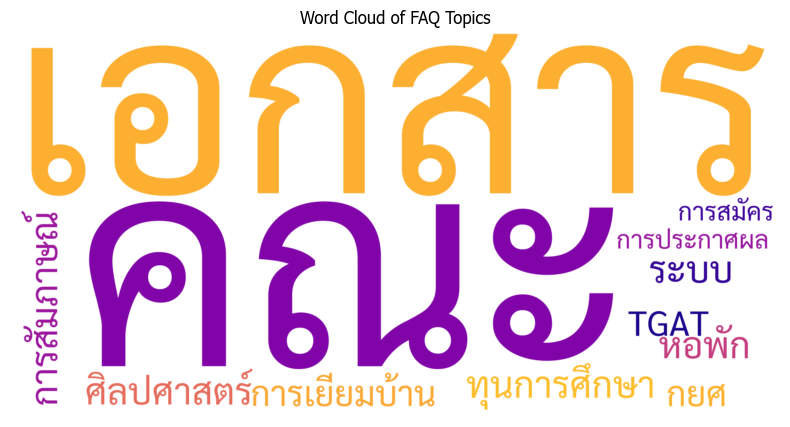

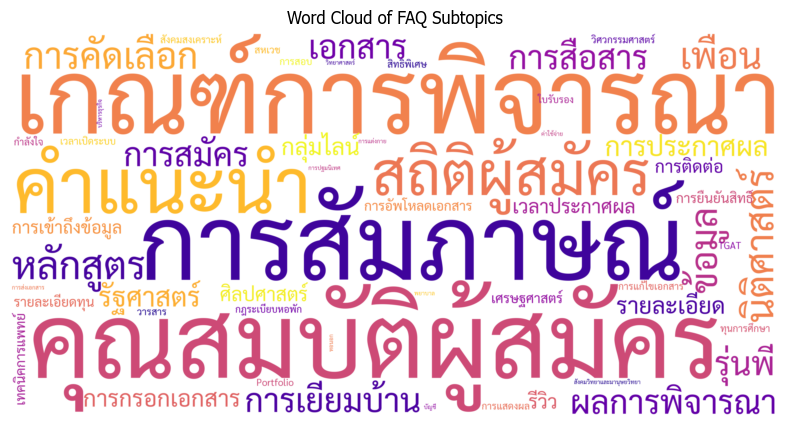

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib as mpl

font_path = file_dir / ".." / "config" / "Sarabun-Regular.ttf"

stop_word = ["ธรรมศาสตร์" , "ธรรมศาสตร์ช้างเผือก"]

plt.rcParams['font.family'] = 'Tahoma'
wordcloud = WordCloud(
                    font_path=font_path, # font ที่เราต้องการใช้ในการแสดงผล เราเลือกใช้ THSarabunNew 
                    stopwords=stop_word, # stop words ที่ใช้ซึ่งจะโดนตัดออกและไม่แสดงบน words cloud 
                    relative_scaling=0.,
                    min_font_size=1,
                    background_color = "white",
                    max_words=500, # จำนวนคำที่เราต้องการจะแสดงใน Word Cloud
                    colormap='plasma', 
                    scale=10,
                    font_step=1,
                    collocations=False,
                    regexp=r"[ก-๙a-zA-Z']+", # Regular expression to split the input text into token
                    margin=2
                    ).generate(all_faq_topics_str) # input คำที่เราตัดเข้าไปจากตัวแปร wt ในรูปแบบ stringplt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of FAQ Topics")
plt.axis('off')
plt.show()

wordcloud = WordCloud(
                    font_path=font_path, # font ที่เราต้องการใช้ในการแสดงผล เราเลือกใช้ THSarabunNew 
                    stopwords=stop_word, # stop words ที่ใช้ซึ่งจะโดนตัดออกและไม่แสดงบน words cloud 
                    relative_scaling=0.,
                    min_font_size=1,
                    background_color = "white",
                    max_words=500, # จำนวนคำที่เราต้องการจะแสดงใน Word Cloud
                    colormap='plasma', 
                    scale=10,
                    font_step=1,
                    collocations=False,
                    regexp=r"[ก-๙a-zA-Z']+", # Regular expression to split the input text into token
                    margin=2
                    ).generate(all_faq_subtopics_str) # input คำที่เราตัดเข้าไปจากตัวแปร wt ในรูปแบบ stringplt.figure(figsize=(10, 5))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of FAQ Subtopics")
plt.show()